## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

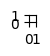

In [2]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

## Initialization

In [3]:
# Variables for the per capita growth rate
tmax = 100
y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
y1_t = np.zeros(tmax)
y2_t = np.zeros(tmax)
per_capita1 = np.zeros(tmax)
per_capita2 = np.zeros(tmax)
y_rel1 = np.zeros(tmax)
y_rel2 = np.zeros(tmax)
y1[0], y2[0] = 5, 5 # initial conditions

## Parameters

In [4]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

In [5]:
## Discrete-time competitive Beverton-Holt model
for i in range(tmax-1):
    y1_t[i+1] = y1[i] # y1 in the previous step, y1[t-1]
    y2_t[i+1] = y2[i] # y2 in the previous step, y2[t-1]
    per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    y1[i+1] = y1[i] * per_capita1[i]
    y2[i+1] = y2[i] * per_capita2[i]
y_rel1 = y1/(y1+y2)
y_rel2 = y2/(y1+y2)    

FileNotFoundError: [Errno 2] No such file or directory: 'img/time_series_r1_20_r2_16_a11_2.7_a12_0.6_a21_0.6_a22_0.6.png'

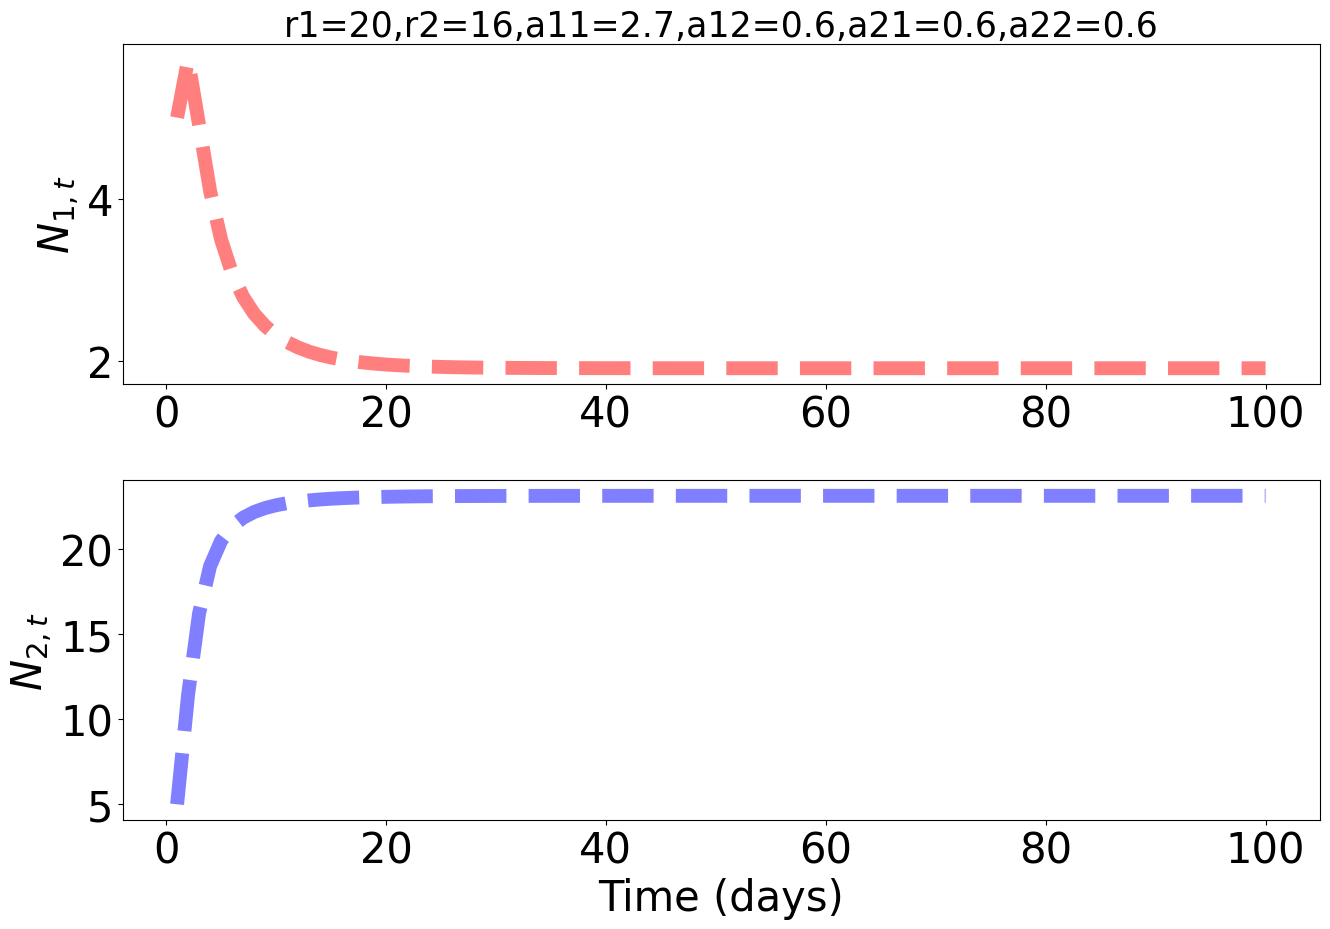

In [6]:
tmax = 100
time = np.linspace(1,tmax,tmax)

fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax1.set(ylabel='$N_{1,t}$')
ax2.plot(time, y2, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax2.set(xlabel='Time (days)', ylabel='$N_{2,t}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [ ]:
tmax = 100
time = np.linspace(1,tmax,tmax)

fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(time, y_rel1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax1.set(ylabel='$N_{1,t}/(N_{1,t}+N_{2,t})$')
ax2.plot(time, y_rel2, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax2.set(xlabel='Time (days)', ylabel='$N_{2,t}/(N_{1,t}+N_{2,t})$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/PGR_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [ ]:
N = np.linspace(1,tmax,tmax)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
ax1.plot(N[:-1], np.log(per_capita1[:-1]), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.plot(N[:-1], np.log(per_capita2[:-1]), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax1.set(ylabel='$log(N_{t+1}/N_{t})$')
#ax1.set_ylim([-1, 2])
ax1.legend()
# Stock-Recruitment
ax2.plot(N, y1, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax2.plot(N,N, color="grey") # add a straight line
ax2.set_ylim([-1, 30])
ax2.plot(N, y2, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax2.plot(N,N, color="grey") # add a straight line
ax2.set(xlabel='$N_{t}$', ylabel='$N_{t+1}$')
ax2.legend()

plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/finite_growth_rate_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

In [ ]:
## N = np.linspace(1,tmax,tmax)
fig, (ax) = plt.subplots(1,figsize=(14, 10))
# Finite Growth Rate
ax.plot(y_rel1[:-1], np.log(per_capita1[:-1]), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r", label='$N_{1,t}$')
ax.axhline(y=0, color='grey', linestyle='-')
ax.plot(y_rel2[:-1], np.log(per_capita2[:-1]), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b", label='$N_{2,t}$')
ax.set(ylabel='$log(N_{t+1}/N_{t})$')
ax.legend()

plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/yenni_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

In [ ]:
stop

In [ ]:
## Discrete-time competitive Beverton-Holt model
for i in range(tmax):
    per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    y1_posterior[i] = y1[i] * per_capita1[i]
    y2_posterior[i] = y2[i] * per_capita2[i]

In [ ]:
tmax = 100
time = np.linspace(1,tmax,tmax)

fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(time, y1_posterior, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax1.set(ylabel='$N_{1,t}$')
ax2.plot(time, y2_posterior, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax2.set(xlabel='Time (days)', ylabel='$N_{2,t}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
#plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [ ]:
stop

## Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

In [ ]:
# Variables for the per capita growth rate
ymax = 20
parts = 2000
y_increasing1 = np.linspace(0,ymax,parts)
y_increasing2 = np.linspace(0,ymax,parts)
per_capita1 = np.zeros(parts)
per_capita2 = np.zeros(parts)
y1_posterior = np.zeros(parts)
y2_posterior = np.zeros(parts)

In [ ]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

## Increasing N1 and N2

In [ ]:
## Discrete-time competitive Beverton-Holt model
for i in range(parts):
    for j in range(parts):
        per_capita1[i] = r1 / ( 1 + a11 * y_increasing1[i] + a12 * y_increasing2[j] )
        per_capita2[j] = r2 / ( 1 + a22 * y_increasing2[j] + a21 * y_increasing1[i] )
        y1_posterior[i] = y_increasing1[i] * per_capita1[i]
        y2_posterior[j] = y_increasing2[j] * per_capita2[j]
y_rel1 = y1_posterior/(y1_posterior+y2_posterior)
y_rel2 = y2_posterior/(y1_posterior+y2_posterior)

In [ ]:
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.plot(y_increasing1, np.log(per_capita1), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax.plot(y_increasing2, np.log(per_capita2), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='$N_{1,t}$',ylabel='$log(N_{1,t+1}/N_{1,t})$')
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_PGR_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,figsize=(8, 6))
ax.plot(y_rel1, np.log(per_capita1), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
ax.plot(y_rel2, np.log(per_capita2), alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b")
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel='Relative frequency',ylabel='$log(N_{1,t+1}/N_{1,t})$')
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
plt.savefig('img/increasing_yenni_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

## Finite Growth Rate and Stock Recruitment Curve

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
ax1.plot(y_increasing1, np.log(per_capita1), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax1.set(ylabel='$log(N_{t+1}/N_{t})$')
ax1.set_xlim([-1, 20])
ax1.plot(y_increasing2, np.log(per_capita2), alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b")
ax1.axhline(y=0, color='grey', linestyle='-')
# Stock-Recruitment
ax2.plot(y_increasing1, y1_posterior, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax2.plot(y_increasing1,y_increasing1, color="grey") # add a straight line
ax2.set_xlim([-1, 20])
ax2.set_ylim([-1, 15])
ax2.set(xlabel='$N_{t}$', ylabel='$N_{t+1}$')
ax2.plot(y_increasing2, y2_posterior, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="b")
ax2.plot(y_increasing2,y_increasing2, color="grey") # add a straight line
plt.rcParams.update({'font.size': 30})
ax1.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout(pad=0)
plt.savefig('img/increasing_finite_growth_rate_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50, bbox_inches='tight')
plt.show()

In [ ]:
stop

## Packages

In [7]:
import numpy as np
import matplotlib.pyplot as plt

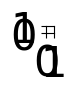

In [8]:
# Dummy plot
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.axhline(y=1, color='grey', linestyle='-')
plt.rcParams.update({'font.size': 30})

## Initialization

In [9]:
# Variables for the per capita growth rate
tmax = 100
y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
y1_t = np.zeros(tmax)
y2_t = np.zeros(tmax)
per_capita1 = np.zeros(tmax)
per_capita2 = np.zeros(tmax)
y_rel1 = np.zeros(tmax)
y_rel2 = np.zeros(tmax)
y1[0], y2[0] = 5, 5 # initial conditions
cov=np.zeros(0)
final_abundance1=np.zeros(0)
final_abundance2=np.zeros(0)

## Parameters

In [10]:
r1=20
r2=16
a11=2.7
a12=0.6
a21=0.6
a22=0.6

In [11]:
## Discrete-time competitive Beverton-Holt model
for i in range(tmax-1):
#    y1_t[i+1] = y1[i] # y1 in the previous step, y1[t-1]
#    y2_t[i+1] = y2[i] # y2 in the previous step, y2[t-1]
    y1[i+1] = y1[i] * r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    y2[i+1] = y2[i] * r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    per_capita1[i] = y1[i+1] / y1[i]
    per_capita2[i] = y2[i+1] / y2[i]
y_rel1 = y1/(y1+y2)
y_rel2 = y2/(y1+y2)    

for r1 in range(15,21,5):
    for r2 in range(11,21,5):
        for a11 in np.arange(0.7,3.1,0.5):
            for a12 in np.arange(0.1,1.1,0.5):
                for a21 in np.arange(0.1,1.1,0.5):
                    for a22 in np.arange(0.1,1.1,0.5):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        for i in range(tmax-1):
                            y1_t[i+1]=y1[i] # y1 in the previous step, y1[t-1]
                            y2_t[i+1]=y2[i] # y2 in the previous step, y2[t-1]
                            per_capita1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
                            per_capita2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
                            y1[i+1] = y1[i] * per_capita1[i]
                            y2[i+1] = y2[i] * per_capita2[i]
                        S=np.array([S1,S2])
                        abundance=np.array([y1[-1],y2[-1]])
                        final_abundance1=np.append(final_abundance1,y1[-1])
                        final_abundance2=np.append(final_abundance2,y2[-1])
                        cov=np.append(cov,np.cov(abundance, S)[0][1])

In [12]:
relat_abundance1 = final_abundance1 / ( final_abundance1 + final_abundance2 )
relat_abundance2 = final_abundance2 / ( final_abundance1 + final_abundance2 )

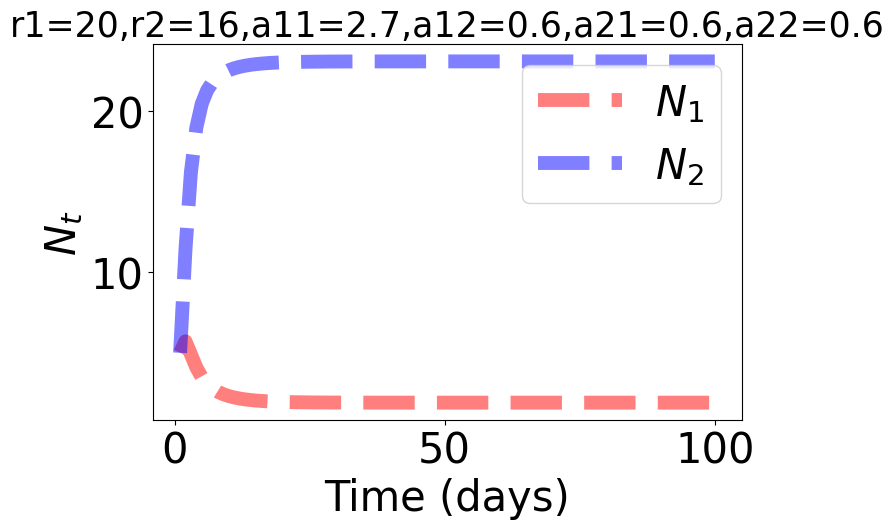

In [13]:
tmax = 100
time = np.linspace(1,tmax,tmax)

fig, (ax) = plt.subplots(1,figsize=(8, 6))
ax.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r", label='$N_{1}$')
ax.plot(time, y2, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b", label='$N_{2}$')
ax.set(xlabel='Time (days)', ylabel='$N_{t}$')
ax.legend()
plt.rcParams.update({'font.size': 30})
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
#plt.savefig('img/yenni_time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

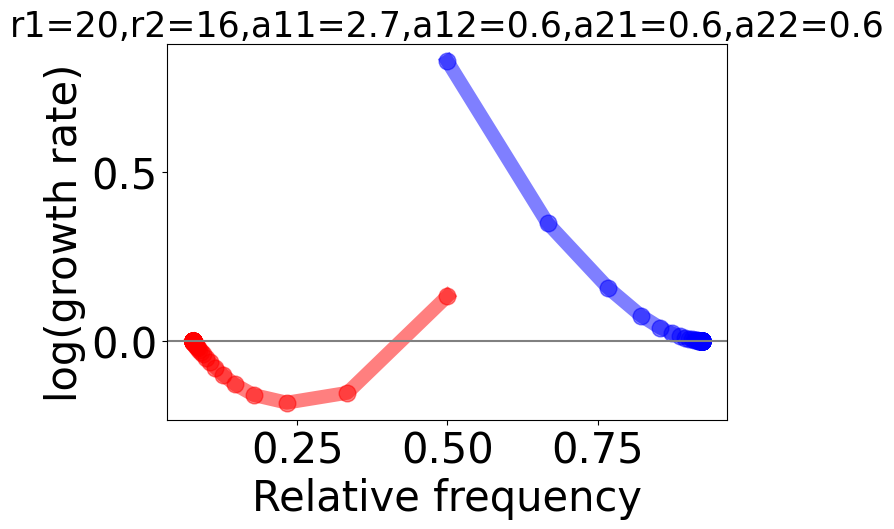

In [14]:
tmax = 100
time = np.linspace(1,tmax,tmax)

Nfreq1 = y1 / ( y1 + y2 )
Nfreq2 = y2 / ( y1 + y2 )
growth1 = np.log(y1[1:-1])-np.log(y1[0:-2])
growth2 = np.log(y2[1:-1])-np.log(y2[0:-2])

fig, ax = plt.subplots(1,figsize=(8, 6))
ax.plot(Nfreq1[:-2],growth1[:],alpha=0.5,linewidth=10,markersize=12,marker="o",color='r')
ax.plot(Nfreq2[:-2],growth2[:],alpha=0.5,linewidth=10,markersize=12,marker="o",color='b')
ax.axhline(y=0, color='grey', linestyle='-')
ax.set(xlabel="Relative frequency",ylabel="log(growth rate)")
ax.set_title('r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.rcParams.update({'font.size': 30})
plt.tight_layout()
#plt.savefig('img/yenni_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()